# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [134]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import researchpy as rp
# import researchpy as rp  
# => rp.summary_cont(fifa['ValueNumeric'])
#ols
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.formula.api import ols

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [121]:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [122]:
fifa.head(3)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [123]:
fifa['valuenumeric2'] = fifa['Value'].apply(lambda x: (float(x.lstrip('€').rstrip('k').rstrip('K').rstrip('M')) * 1000) if x[-1] in ['k', 'K'] else (float(x.lstrip('€').rstrip('K').rstrip('k').rstrip('M')) * 1000000))

In [124]:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,valuenumeric2
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110500000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77000000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118500000.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72000000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102000000.0


In [127]:
#fifa.dtypes
#fifa["ValueNumeric"]=pd.to_numeric(fifa["ValueNumeric"], errors='coerce')
#fifa['ValueNumeric'].dtypes

In [46]:
fifa = fifa.rename(columns={"Preferred Foot": "Preferred_Foot"})

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

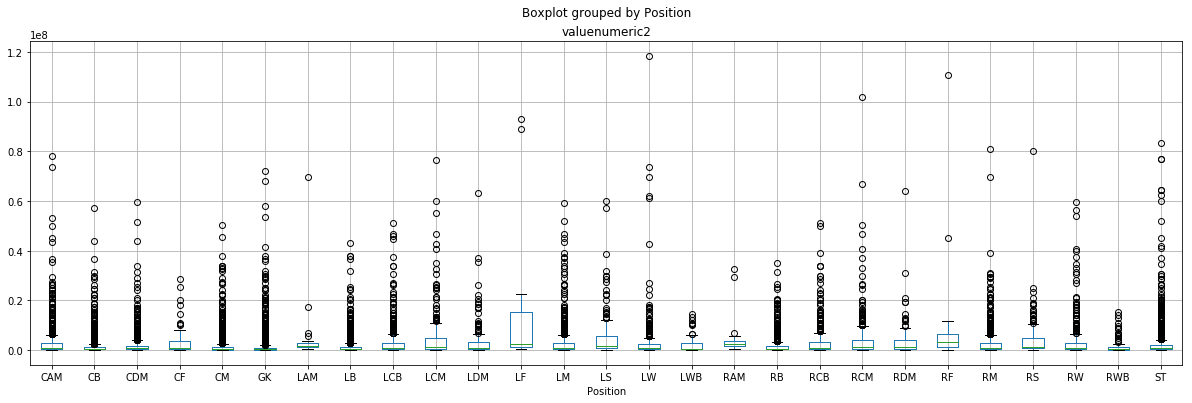

In [119]:
fifa.boxplot("valuenumeric2", by="Position", figsize=(20,6))

In [129]:
w, pvalue = stats.levene(fifa['Overall'], fifa['valuenumeric2'])
print(w, pvalue)

2652.0003709729676 0.0


In [130]:
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.9547106623649597 0.0


C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [131]:
rp.summary_cont(fifa['Age'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Age,18207.0,25.122206,4.669943,0.034609,25.054368,25.190043


In [133]:
rp.summary_cont(fifa['valuenumeric2']) 

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,valuenumeric2,18207.0,2.410696e+06,5.594933e+06,41464.427026,2.329422e+06,2.491970e+06


What is your conclusion from this ANOVA?

We'd like to determine whether a player's preffered foot and position have an impact on their value.
Using the statsmodels library, we are able to produce an ANOVA table without munging our data. 
Create an ANOVA table with value as a function of position and preferred foot. 
Recall that pivoting is performed by the C function.

In [62]:
model = ols('valuenumeric2 ~ Overall + C(Position) + C(Preferred_Foot) + Age + Nationality + C(Position) * C(Preferred_Foot)', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


,sum_sq,df,F,PR(>F)
C(Position),5.453118e+15,26.0,12.630365,1.521384e-53
C(Preferred_Foot),3.291912e+13,1.0,1.982406,1.591545e-01
Nationality,9.286608e+15,163.0,3.430946,6.152645e-44
C(Position):C(Preferred_Foot),1.999122e+15,26.0,4.630312,4.820087e-14
Overall,2.176479e+17,1.0,13106.866723,0.000000e+00
Age,3.149908e+16,1.0,1896.890155,0.000000e+00
Residual,2.977059e+17,17928.0,NaN,NaN


In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Stamina   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:12:13   Log-Likelihood:                -71590.
No. Observations:               18159   AIC:                         1.432e+05
Df Residuals:                   18157   BIC:                         1.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.6850      0.419     46.949      0.000      18.863      20.507
SprintSpeed     0.6726      0.006    106.457      0.000       0.660       0.685
==============================================================================
Omnibus:                       25.226   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.304
Skew:                          -0.091   Prob(JB):                     3.20e-06
Kurtosis:                       3.004   Cond. No.                         301.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
fifa['resids'] = model.resid.apply(abs)

In [101]:
fifa.sort_values('resids', ascending = False).head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred_Foot,Position,Weak Foot,...,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric,valuenumeric2,resids
10215,R. Miyaichi,25,Japan,65,68,FC St. Pauli,€675K,Right,RM,4.0,...,29.0,41.0,22.0,25.0,60.0,59.0,62.0,675,675000.0,49.563596
7323,Kim In Seong,28,Korea Republic,68,68,Ulsan Hyundai FC,€900K,Right,RM,3.0,...,56.0,40.0,33.0,22.0,57.0,48.0,66.0,900,900000.0,46.563596
4053,Vadillo,23,Spain,71,77,Granada CF,€3.2M,Right,RM,3.0,...,41.0,62.0,46.0,39.0,62.0,56.0,59.0,3,3200000.0,46.236189
16069,D. Petersson,23,Sweden,58,63,Trelleborgs FF,€120K,Right,GK,1.0,...,27.0,9.0,39.0,28.0,7.0,30.0,14.0,120,120000.0,45.730993
242,Dani García,28,Spain,82,83,Athletic Club de Bilbao,€20M,Right,RCM,3.0,...,75.0,58.0,88.0,82.0,60.0,76.0,58.0,20,20000000.0,44.774203
4804,Ramón Folch,28,Spain,70,70,Real Oviedo,€1.8M,Right,LCM,3.0,...,67.0,62.0,67.0,74.0,62.0,66.0,57.0,1,1800000.0,44.429017
3378,J. Babin,31,France,72,72,Real Sporting de Gijón,€2.1M,Right,LCB,3.0,...,88.0,63.0,62.0,69.0,49.0,57.0,44.0,2,2100000.0,44.119389
3392,E. Martínez,25,Argentina,72,77,Arsenal,€3M,Right,GK,3.0,...,70.0,16.0,37.0,13.0,12.0,50.0,42.0,3,3000000.0,44.022842
16455,A. Obaid,22,Saudi Arabia,57,66,Al Batin,€160K,Right,LM,4.0,...,38.0,33.0,30.0,16.0,49.0,54.0,50.0,160,160000.0,43.837666
593,I. Marcone,28,Argentina,79,80,Cruz Azul,€11.5M,Right,RDM,3.0,...,85.0,66.0,84.0,76.0,56.0,69.0,59.0,11,11500000.0,43.446796


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [136]:
model_nation = ols('valuenumeric2 ~ C(Nationality)', data=fifa).fit()
anova_table_nation = sm.stats.anova_lm(model_nation, typ=2)
anova_table_nation

,sum_sq,df,F,PR(>F)
C(Nationality),3.281224e+16,163.0,6.762478,4.840477e-134
Residual,5.370951e+17,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

Null HYP: the means of the groups - within Nationalities are equal
    
    Probability of finding F-statistics 3.20523 as extreme as this value by chance is 1.747201e-38

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [137]:
fifa.shape

(18207, 21)

In [138]:
fifa.isnull().values.any()

True

In [139]:
fifa.isnull().sum().sum()

877

In [140]:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
valuenumeric2       0
dtype: int64

In [141]:
# fifa.dropna()

In [142]:
fifa1 = fifa[pd.notnull(fifa['Stamina'])]
fifa1.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot      0
Position           12
Weak Foot           0
Acceleration        0
SprintSpeed         0
Stamina             0
Strength            0
LongShots           0
Aggression          0
Interceptions       0
Positioning         0
Vision              0
Penalties           0
valuenumeric2       0
dtype: int64

In [143]:
fifa1.shape

(18159, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [144]:
"""sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter in LinearRegression().
If you don't do sm.add_constant or when LinearRegression(fit_intercept=False), then both statsmodels and 
sklearn algorithms assume that b=0 in y = mx + b, 
and it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data. """

"sm.add_constant in statsmodel is the same as sklearn's fit_intercept parameter in LinearRegression().\nIf you don't do sm.add_constant or when LinearRegression(fit_intercept=False), then both statsmodels and \nsklearn algorithms assume that b=0 in y = mx + b, \nand it'll fit the model using b=0 instead of calculating what b is supposed to be based on your data. "

In [145]:
#Sklearn https://realpython.com/linear-regression-in-python/
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression

# reg = linear_model.LinearRegression()
# x=np.array([fifa1.Stamina]).reshape((-1,1))
# y=np.array([fifa1.SprintSpeed]).reshape((-1, 1))
# X2 = sm.add_constant(x)
# lRes = sm.OLS(y, X2).fit()
# lRes.params
# => array([28.60494903,  0.5713706 ])
# reg.coef_
# reg.coef_

In [150]:
X = fifa1[['SprintSpeed']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = fifa1['Stamina']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Stamina   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:22:24   Log-Likelihood:                -71590.
No. Observations:               18159   AIC:                         1.432e+05
Df Residuals:                   18157   BIC:                         1.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          19.6850      0.419     46.949      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [147]:
# C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
#   return ptp(axis=axis, out=out, **kwargs)

Interpreting the Regression Results
I highlighted several important components within the results:

Adjusted. R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
const coefficient is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.
Interest_Rate coefficient represents the change in the output Y due to a change of one unit in the interest rate (everything else held constant)
Unemployment_Rate coefficient represents the change in the output Y due to a change of one unit in the unemployment rate (everything else held constant)
std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy
P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant
Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [151]:
X = fifa1[['Potential']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = fifa1['Acceleration']

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Acceleration   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     1058.
Date:                Mon, 16 Sep 2019   Prob (F-statistic):          1.55e-225
Time:                        21:22:31   Log-Likelihood:                -74340.
No. Observations:               18159   AIC:                         1.487e+05
Df Residuals:                   18157   BIC:                         1.487e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.8977      1.257     19.017      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [ ]:
# Your conclusions here:
fifa1


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

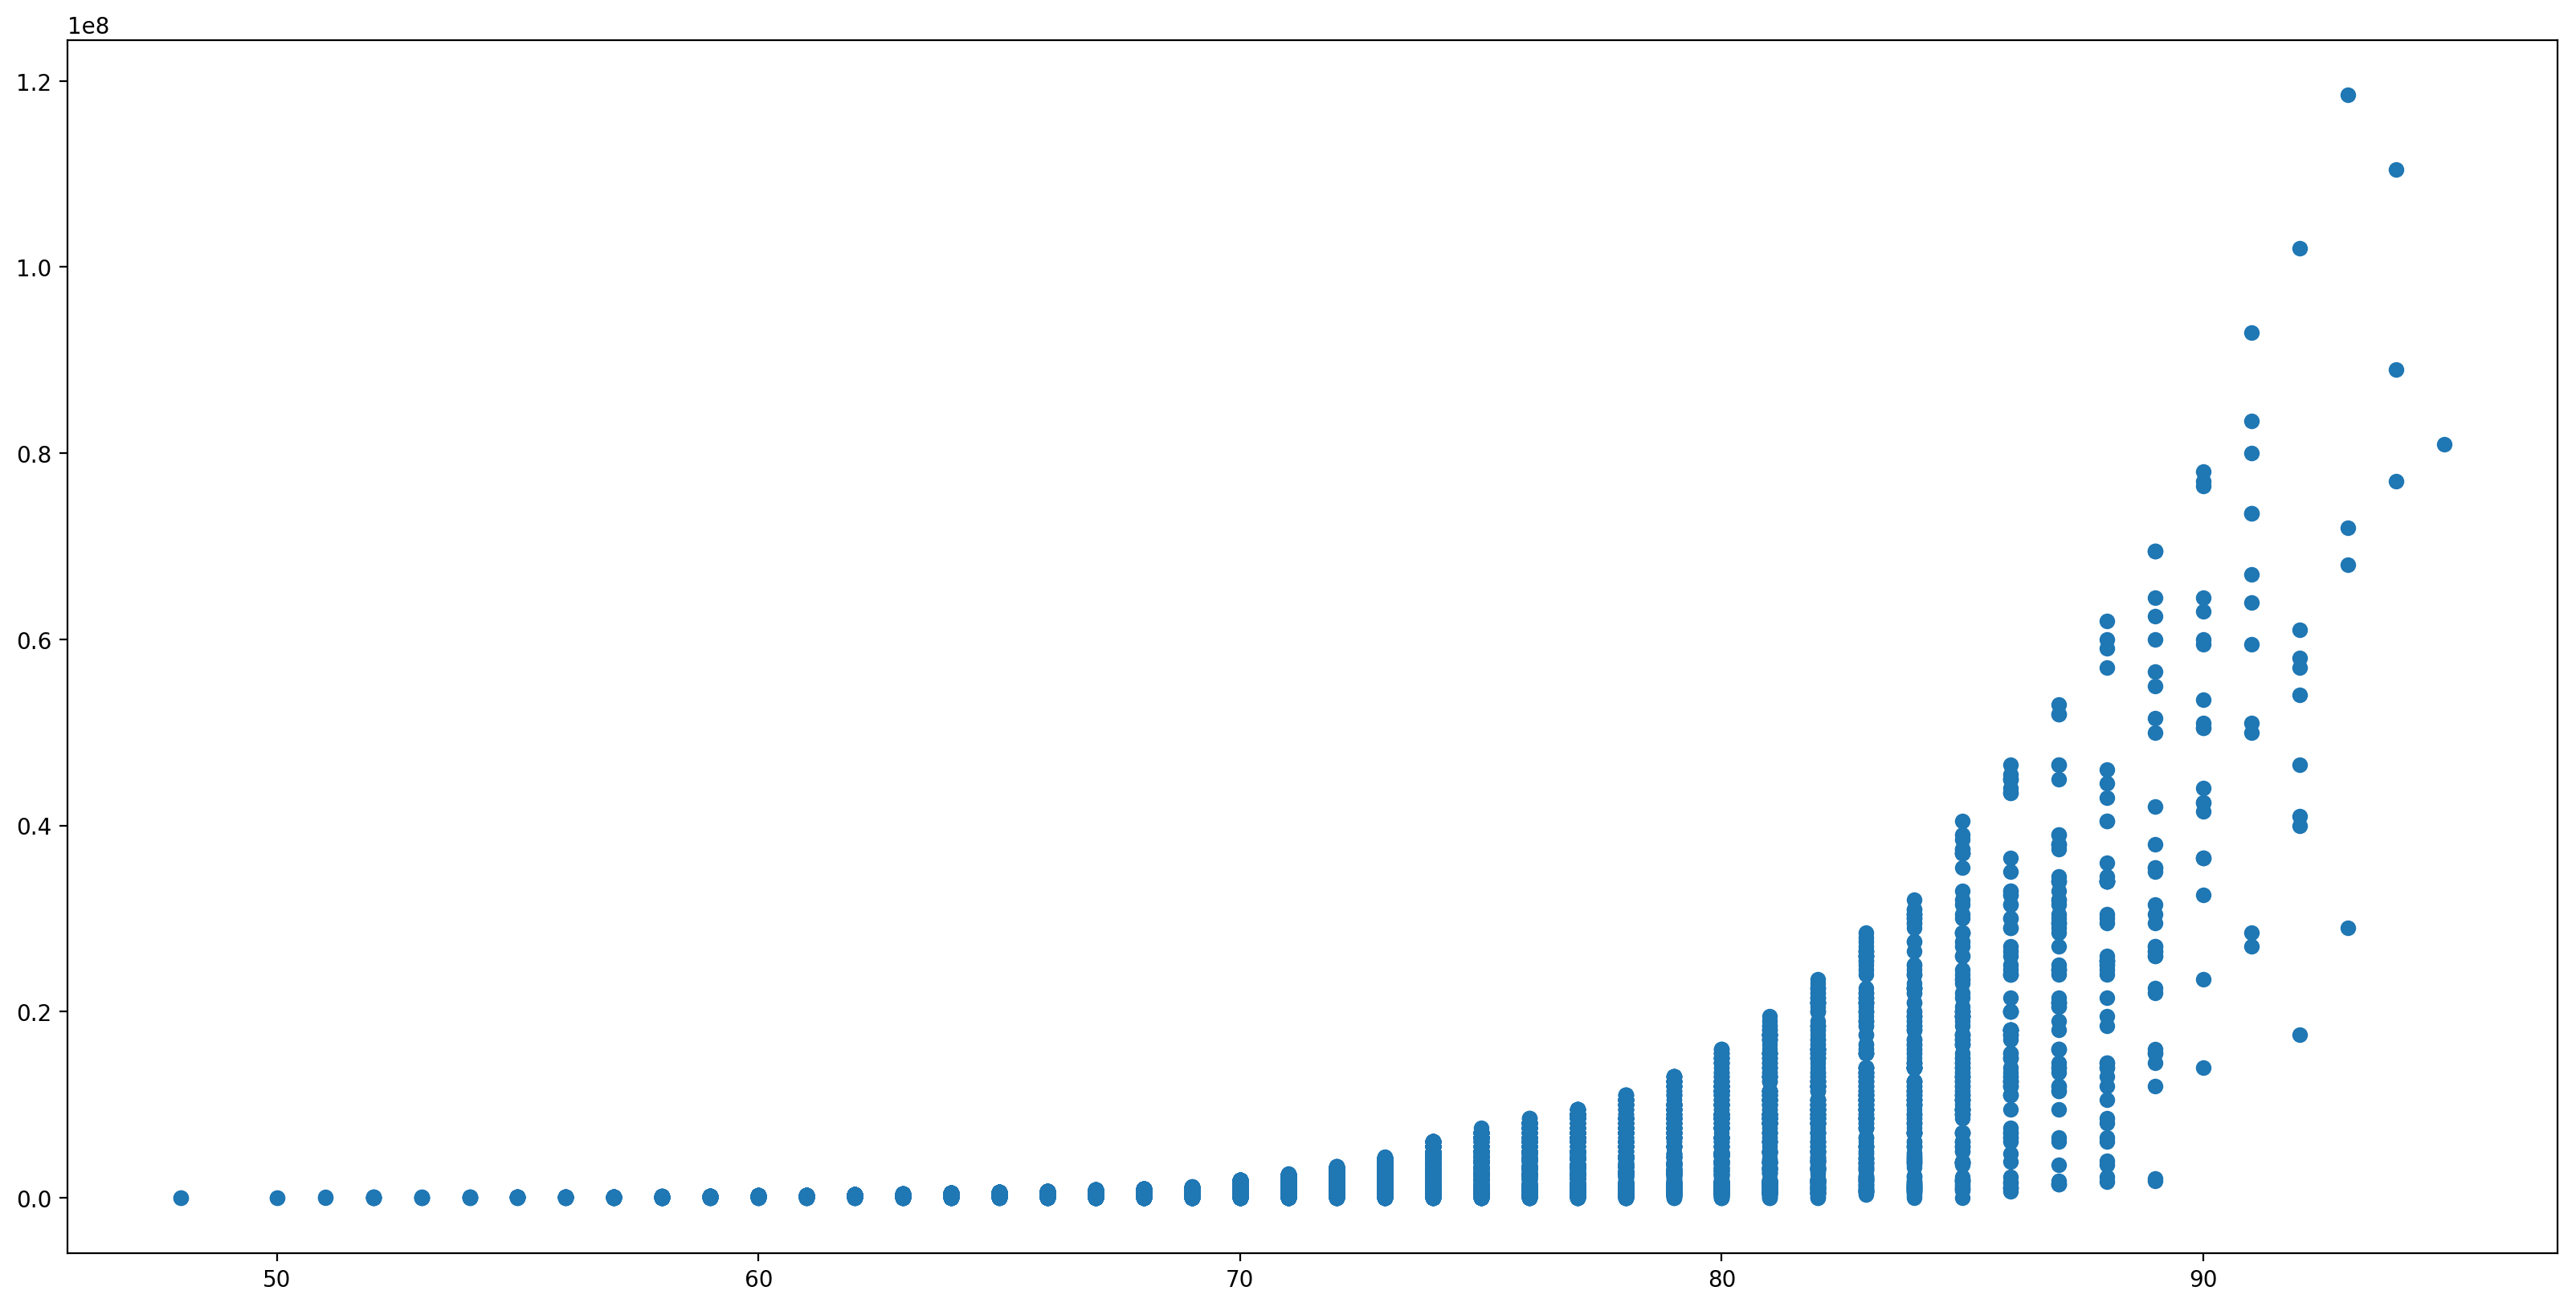

In [152]:
plt.figure(figsize=(20, 10), dpi=200)
plt.scatter( fifa['Potential'], fifa['valuenumeric2'])